In [1]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.special as sf
import scipy.interpolate as interp


%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
mpl.rcParams['figure.figsize'] = (12, 8)

In [2]:
loc1 = (r"C:\Users\aidan\Documents\PHYS 318\New folder\Hall Voltage Temp Sweep.xlsx")
VHwb = xlrd.open_workbook(loc1)
VHsh = VHwb.sheet_by_index(0)

loc2 = (r"C:\Users\aidan\Documents\PHYS 318\New folder\Longitudinal Voltage Temp Sweep.xlsx")
VLwb = xlrd.open_workbook(loc2)
VLsh = VLwb.sheet_by_index(0)

In [3]:
VH = np.zeros(8070)
VHtemp = np.zeros(8070)

for i in range(0,8070):
    VH[i] = VHsh.cell_value(i,3)
    if(float(VHsh.cell_value(i,4)) <300):
        VHtemp[i] = float(VHsh.cell_value(i,4))
    else:
        VHtemp[i] = float(VHsh.cell_value(i,4))/10

VL = np.zeros(18000)
VLtemp = np.zeros(18000)

for j in range(0,18000):
    VL[j] = VLsh.cell_value(j,3)
    if(float(VLsh.cell_value(j,4))<300):
        VLtemp[j] = float(VLsh.cell_value(j,4))
    else:
        VLtemp[j] = float(VLsh.cell_value(j,4))/10

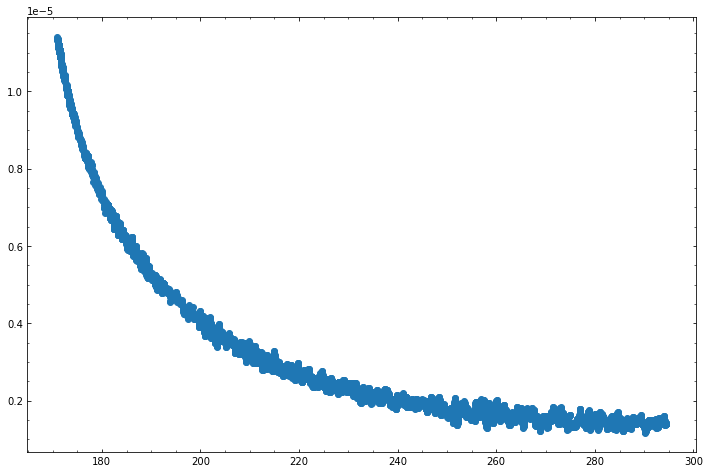

In [4]:
plt.scatter(VHtemp[50:VHtemp.size-25], VH[50:VH.size-25])

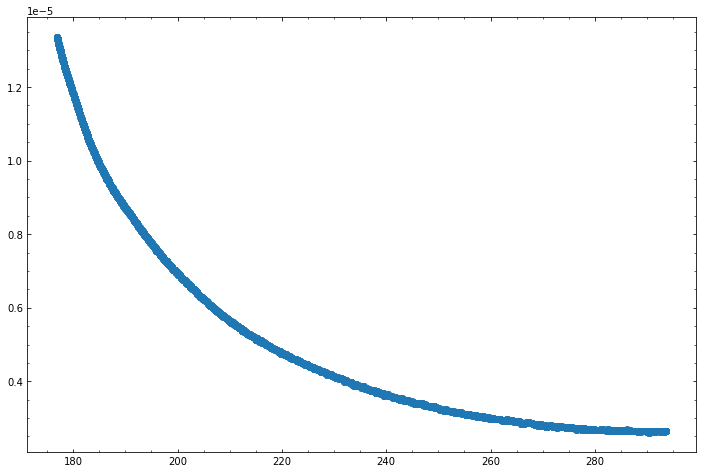

In [5]:
plt.scatter(VLtemp[50:VLtemp.size-7500],VL[50:VL.size-7500])

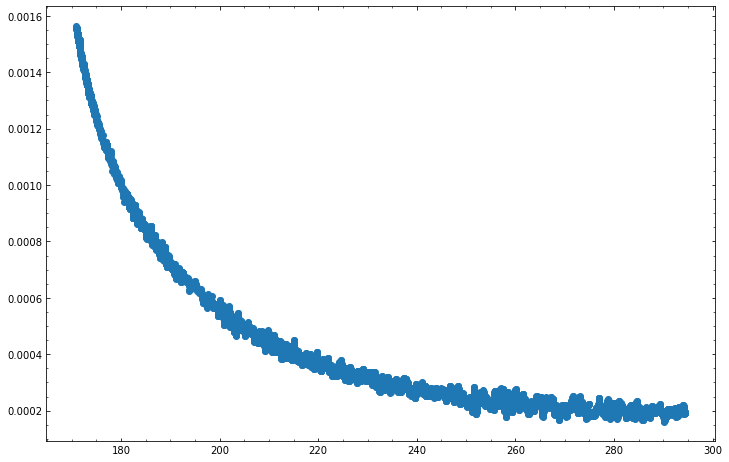

In [6]:
RH = (VH*650e-6)/(2e-5*0.237)

plt.scatter(VHtemp[50:VHtemp.size-25], RH[50:RH.size-25])

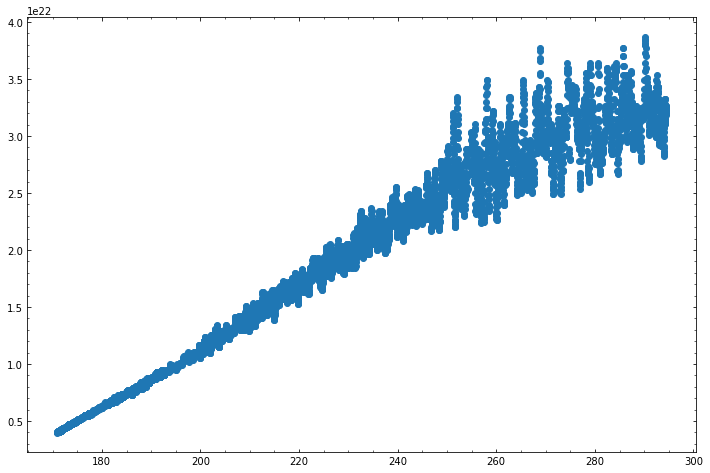

In [7]:
n = 1/(1.602e-19*RH)

plt.scatter(VHtemp[50:VHtemp.size-25], n[50:n.size-25])

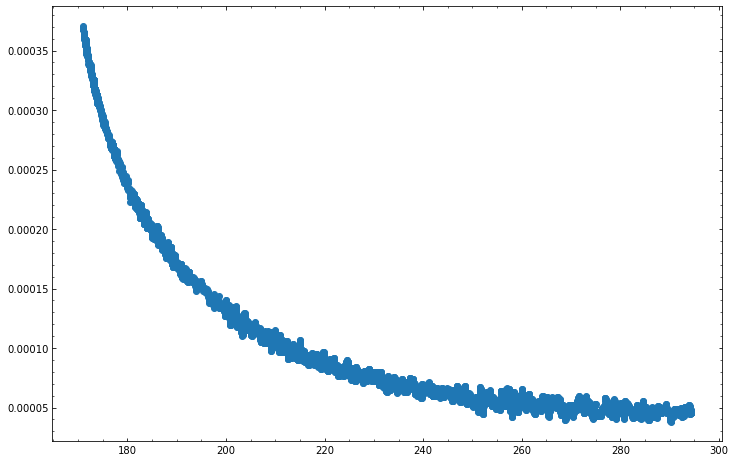

In [8]:
rhoH = (0.237*RH)

plt.scatter(VHtemp[50:VHtemp.size-25], rhoH[50:rhoH.size-25])

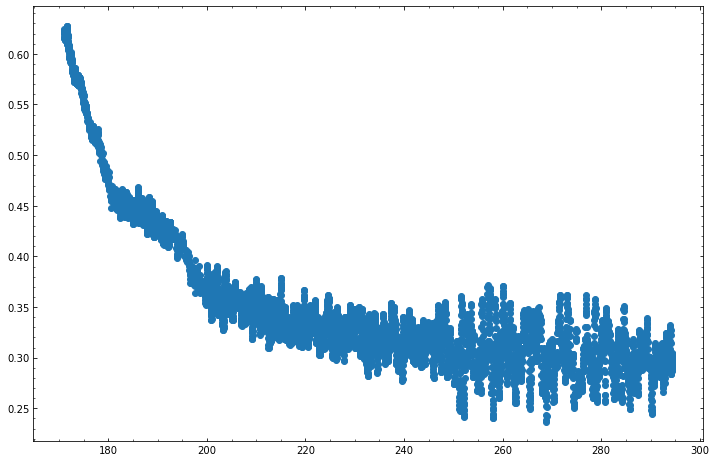

In [9]:
rhoL = (VL*5e-3)/(2e-5)

mu = RH/rhoL[:8070]

plt.scatter(VHtemp[50:VHtemp.size-25], mu[50:mu.size-25])

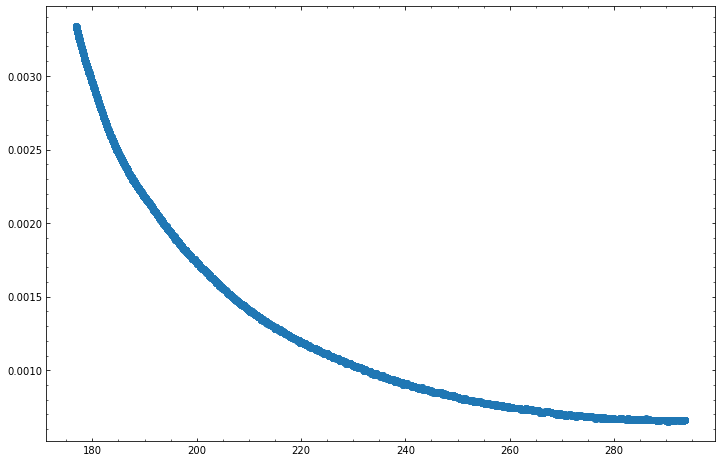

In [10]:
plt.scatter(VLtemp[50:VLtemp.size-7500],rhoL[50:rhoL.size-7500])

In [11]:
B = .237
Bunc = 0.003
I = 2e-5
Iunc = 1e-6

In [12]:
VHunc = VH*0.01
VLunc = VL*0.01

In [13]:
d = 650e-6
dunc = 10e-6
L = 5e-3
Lunc = 0.5e-3

In [14]:
RHunc = np.sqrt((VHunc*d/(I*B))**2+(VH*dunc/(I*B))**2+(VH*d*Iunc/(I**2*B))**2+(VH*d*Bunc/(I*B**2))**2)

In [15]:
rhoHunc = np.sqrt((Bunc*RH)**2+(B*RHunc)**2)

In [16]:
nunc = RHunc/(1.602e-19*RH**2)

In [17]:
rhoLunc = np.sqrt((VLunc*L/I)**2+(VL*Lunc/I)**2+(VL*L*Iunc/I**2)**2)

In [18]:
muunc1 = (RHunc/rhoL[:8070])**2
muunc2 = (RH*rhoLunc[:8070]/rhoL[:8070]**2)**2
muunc = np.sqrt(muunc1+muunc2)

In [19]:
 def line(x,m,b):
        return (-m*x)+b

condH = 1/rhoH

In [20]:
invT = 1/VHtemp

In [21]:
(Efit, fiterr)=opt.curve_fit(lambda x,m,b:line(x,m,b), invT, np.log(condH), p0 = np.array([4,0]))

In [22]:
print(Efit[0]*2*1.38e-23)

2.320102394619523e-20


In [23]:
print(Efit[0]*2*1.38e-23*6.242e18)
print(2*1.38e-23*6.242e18*np.sqrt(np.diag(fiterr)))

0.14482079147215063
[4.34694996e-04 2.03992218e-06]


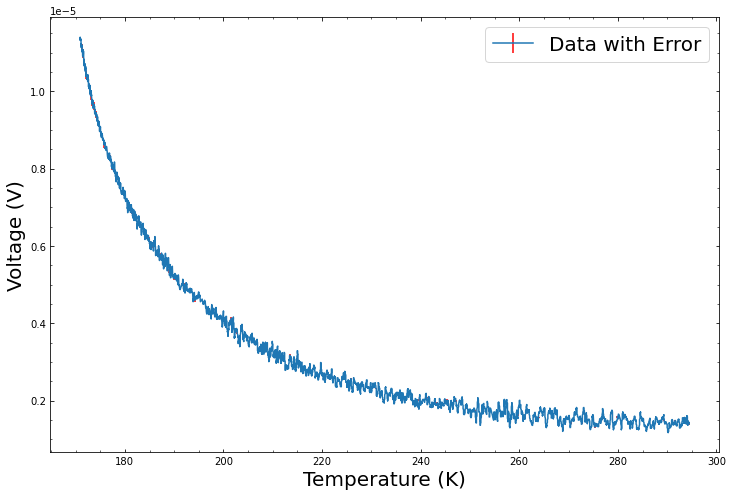

In [24]:
plt.errorbar(VHtemp[50:VHtemp.size-25], VH[50:VH.size-25],VHunc[50:VHunc.size-25],errorevery=100, ecolor = 'r', label ='Data with Error')
plt.xlabel('Temperature (K)', fontsize = 20)
plt.ylabel('Voltage (V)', fontsize = 20)
plt.legend(loc='best', fontsize = 20)

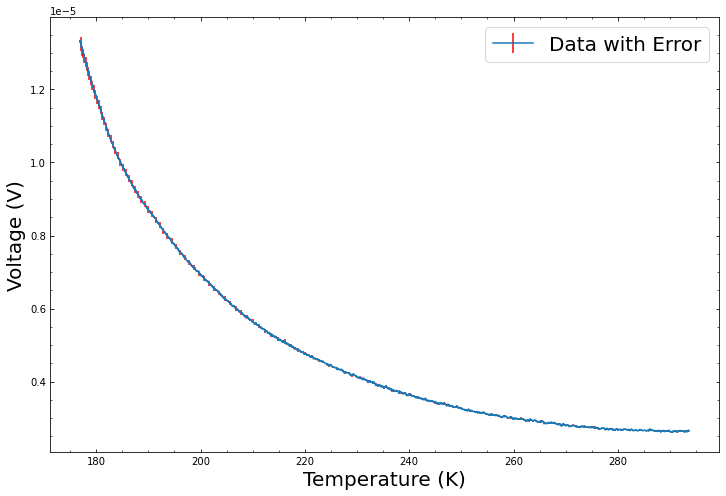

In [25]:
plt.errorbar(VLtemp[50:VLtemp.size-7500],VL[50:VL.size-7500],VLunc[50:VLunc.size-7500],errorevery=100,ecolor = 'r',label ='Data with Error')
plt.xlabel('Temperature (K)', fontsize = 20)
plt.ylabel('Voltage (V)', fontsize = 20)
plt.legend(loc='best', fontsize = 20)

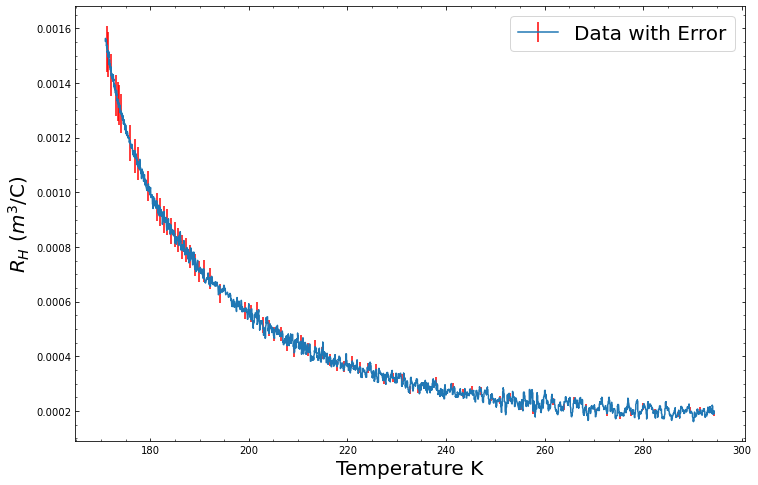

In [35]:
plt.errorbar(VHtemp[50:VHtemp.size-25], RH[50:RH.size-25], RHunc[50:RHunc.size-25], errorevery = 100, ecolor = 'r',label ='Data with Error')
plt.xlabel('Temperature K', fontsize = 20)
plt.ylabel(r"$R_H$ ($m^3$/C)", fontsize = 20)
plt.legend(loc='best', fontsize = 20)

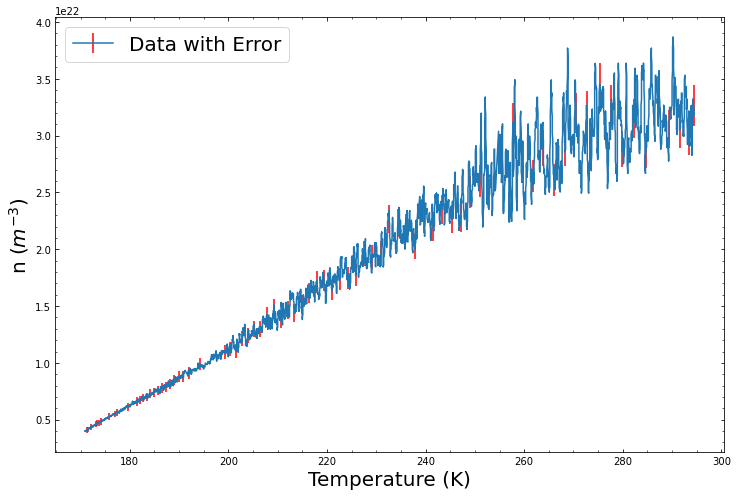

In [36]:
plt.errorbar(VHtemp[50:VHtemp.size-25], n[50:n.size-25], nunc[50:nunc.size-25], errorevery=100, ecolor='r',label ='Data with Error')
plt.xlabel('Temperature (K)', fontsize = 20)
plt.ylabel(r"n $(m^{-3})$", fontsize = 20)
plt.legend(loc='best', fontsize = 20)

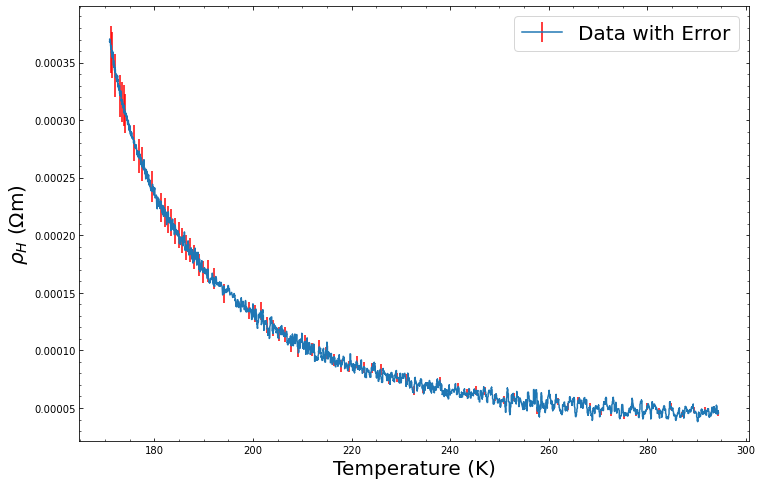

In [37]:
plt.errorbar(VHtemp[50:VHtemp.size-25], rhoH[50:rhoH.size-25], rhoHunc[50:rhoHunc.size-25], errorevery=100, ecolor = 'r',label ='Data with Error')
plt.xlabel('Temperature (K)', fontsize = 20)
plt.ylabel(r"$\rho_H$ ($\Omega$m)", fontsize = 20)
plt.legend(loc='best', fontsize = 20)

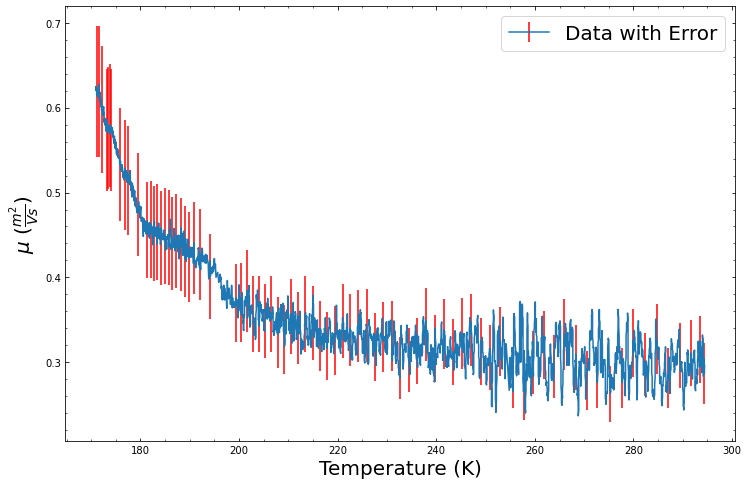

In [40]:
plt.errorbar(VHtemp[50:VHtemp.size-25], mu[50:mu.size-25], muunc[50:muunc.size-25], errorevery = 100, ecolor = 'r',label ='Data with Error')
plt.xlabel('Temperature (K)', fontsize = 20)
plt.ylabel(r"$\mu$ ($\frac{m^2}{Vs}$)", fontsize = 20)
plt.legend(loc='best', fontsize = 20)

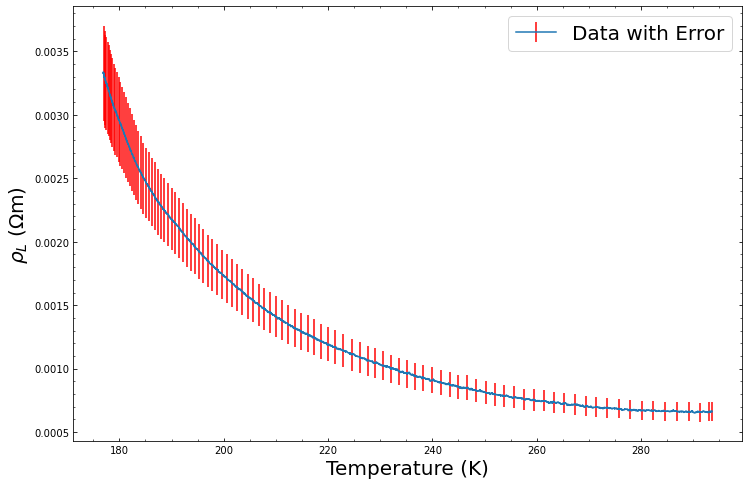

In [41]:
plt.errorbar(VLtemp[50:VLtemp.size-7500],rhoL[50:rhoL.size-7500], rhoLunc[50:rhoLunc.size-7500], errorevery=100, ecolor = 'r',label ='Data with Error')
plt.xlabel('Temperature (K)', fontsize = 20)
plt.ylabel(r"$\rho_L$ ($\Omega$m)", fontsize = 20)
plt.legend(loc='best', fontsize = 20)

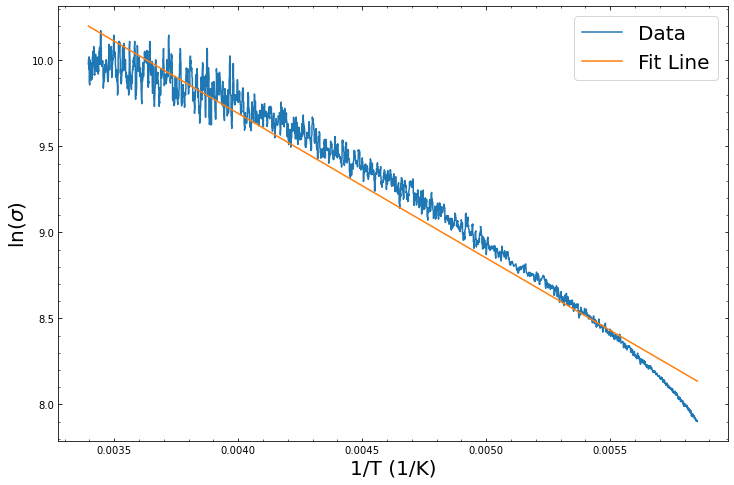

In [31]:
plt.plot(invT[50:invT.size-25], np.log(condH[50:condH.size-25]), label = 'Data')
plt.plot(invT[50:invT.size-25], line(invT[50:invT.size-25], *Efit), label = 'Fit Line')
plt.xlabel('1/T (1/K)', fontsize = 20)
plt.ylabel(r"ln($\sigma$)", fontsize = 20)
plt.legend(loc='best', fontsize = 20)

In [32]:
chisq = np.sum((np.log(condH[50:condH.size-25])-line(invT[50:invT.size-25], *Efit))**2/np.log(1/rhoH[50:rhoH.size-25])**2)
dof = len(condH[50:condH.size-25])-len(Efit)
Q =sf.gammaincc(0.5*dof, 0.5*chisq)

print(chisq)
print(dof)
print(Q)

1.2598871961173839
7993
1.0
